In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
plt.style.use('seaborn')

In [5]:
#Data Preparation

In [7]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.3]])

#Normal Distribution
dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_01,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


In [8]:
#Data visualize

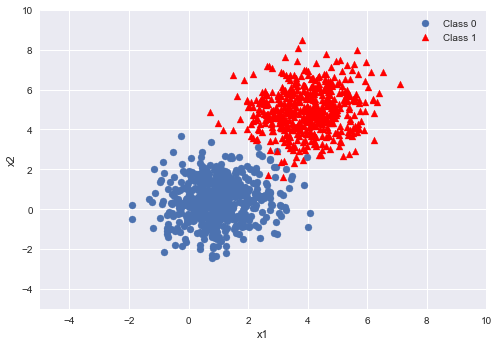

In [10]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [11]:
#Create Training and Test Set

In [13]:
data=np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [16]:
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[500:,-1]=1.0


In [18]:
np.random.shuffle(data)
print(data[:10])

[[ 4.77235067  4.70533939  1.        ]
 [ 3.3812547   3.73867413  1.        ]
 [ 2.36552006  2.7567034   0.        ]
 [ 4.37042502  6.08479349  1.        ]
 [ 3.01332967  4.56541994  1.        ]
 [ 3.34693906  5.1083908   1.        ]
 [ 1.64401009  5.69496898  1.        ]
 [-0.72314344 -0.96718251  0.        ]
 [ 3.59972135  2.5943164   1.        ]
 [ 5.2155677   5.34062659  1.        ]]


In [20]:
split=int(0.8*data.shape[0])

In [22]:
X_Train=data[:split,:-1]
X_Test=data[split:,:-1]

Y_Train=data[:split,-1]
Y_Test=data[split:,-1]

print(X_Train.shape,X_Test.shape)
print(Y_Train.shape,Y_Test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [23]:
#Logistic Regression Functions

In [32]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [33]:
loss = []
acc = []

W = 2*np.random.random((X_Train.shape[1],))
b = 5*np.random.random()

In [34]:
for i in range(1000):
    l,W,b = grad_descent(X_Train,Y_Train,W,b)
    acc.append(get_acc(X_Test,Y_Test,W,b))
    loss.append(l)

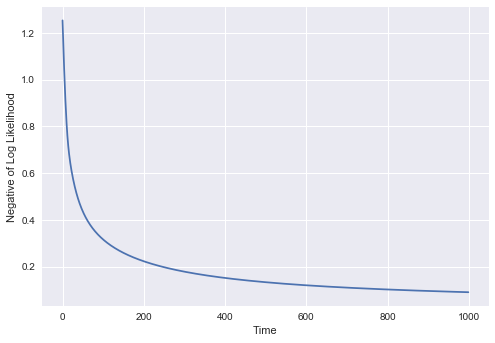

In [35]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

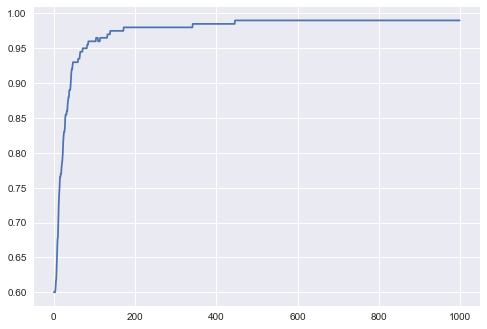

0.99


In [36]:
plt.plot(acc)
plt.show()
print(acc[-1])